In [1]:
import pyrosm

/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-indic/pedestrian-way-types/.venv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import json

In [3]:
from pathlib import Path
import sys

import geopandas as gpd
import networkx as nx
import osmnx as ox
from shapely.ops import polygonize


In [4]:
gpd.options.use_pygeos = True

/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-indic/pedestrian-way-types/.venv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [5]:
def log(message: str):
    print(message, file=sys.__stdout__)

In [6]:
ox.config(log_console=True, use_cache=True)

2021-08-23 15:52:34 Configured OSMnx 1.1.1
2021-08-23 15:52:34 HTTP response caching is on


In [7]:
LOCATION="Clapiers,France"
G = ox.graph_from_place(LOCATION, network_type='walk') #retain_all=True)

2021-08-23 15:53:08 Pausing 1 seconds before making HTTP GET request
2021-08-23 15:53:09 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Clapiers%2CFrance with timeout=180
2021-08-23 15:53:10 Downloaded 9.5kB from nominatim.openstreetmap.org
2021-08-23 15:53:10 Saved response to cache file "cache/19a18ff64d8a1b3a7bfe2a28b484e42b3c256333.json"
2021-08-23 15:53:10 Created GeoDataFrame with 1 rows from 1 queries
2021-08-23 15:53:10 Constructed place geometry polygon(s) to query API
2021-08-23 15:53:10 Projected GeoDataFrame to +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-08-23 15:53:11 Projected GeoDataFrame to epsg:4326
2021-08-23 15:53:11 Projected GeoDataFrame to +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-08-23 15:53:11 Projected GeoDataFrame to epsg:4326
2021-08-23 15:53:11 Requesting data within polygon from API in 1 request(s)
2021-08-23 15:53:11 Resolved overpass-api

In [8]:
# consolidate graph
consolidated_G = ox.consolidate_intersections(ox.project_graph(G))

2021-08-23 15:53:46 Created nodes GeoDataFrame from graph
2021-08-23 15:53:46 Projected GeoDataFrame to +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-08-23 15:53:47 Created edges GeoDataFrame from graph
2021-08-23 15:53:47 Projected GeoDataFrame to +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-08-23 15:53:47 Created graph from node/edge GeoDataFrames
2021-08-23 15:53:47 Projected graph with 1165 nodes and 3242 edges
2021-08-23 15:53:47 Created nodes GeoDataFrame from graph
2021-08-23 15:53:49 Created nodes GeoDataFrame from graph
2021-08-23 15:53:50 Created edges GeoDataFrame from graph


In [9]:
edges_gdf = ox.utils_graph.graph_to_gdfs(consolidated_G, nodes=False, edges=True)
edges_gdf.to_crs(crs="epsg:4326", inplace=True)

2021-08-23 15:55:04 Created edges GeoDataFrame from graph


In [50]:
polys = list(polygonize(edges_gdf.geometry.unary_union))
osmnx_cycles_gdf = gpd.GeoDataFrame(geometry=polys, crs="epsg:4326")
del polys

In [22]:
ls

cache/         download.sh*         requirements-dev.in*   Untitled.ipynb*
clapiers.pbf*  notebook.ipynb*      requirements-dev.txt*
compute.sh*    parameter_profiles/  requirements.in*
Dockerfile*    README.md*           requirements.txt*


In [28]:
osm=pyrosm.OSM("clapiers.pbf")
foot_net = osm.get_network(network_type="walking")

In [35]:
foot_edges=foot_net.geometry.unary_union

In [49]:
polys = list(polygonize(foot_edges))
pyrosm_cycles_gdf = gpd.GeoDataFrame(geometry=polys, crs="epsg:4326")
del polys

<AxesSubplot:>

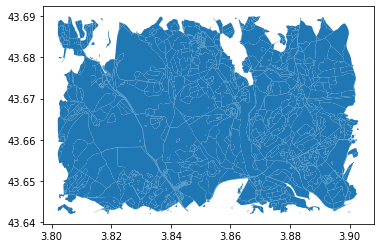

In [42]:
cycles_gdf.plot()

In [39]:
import folium

In [52]:
m = folium.Map(location=[43.660,3.885], zoom_start=13)

In [43]:
#folium.Choropleth(foot_edges, line_color='blue', line_weight=1).add_to(m)

In [53]:
folium.Choropleth(pyrosm_cycles_gdf, line_color='white', line_weight=1).add_to(m)
folium.Choropleth(osmnx_cycles_gdf, line_color='red', line_weight=1).add_to(m)

In [55]:
folium.LayerControl().add_to(m)
display(m)